### Importing neccessary libary

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, classification_report
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.preprocessing import StandardScaler



### Imoporting data from `ucimlrepo`

In [22]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
concrete_compressive_strength = fetch_ucirepo(id=165) 
  
# data (as pandas dataframes) 
X = concrete_compressive_strength.data.features 
y = concrete_compressive_strength.data.targets 
  
# metadata 
print(concrete_compressive_strength.metadata) 
  
# variable information 
print(concrete_compressive_strength.variables) 


{'uci_id': 165, 'name': 'Concrete Compressive Strength', 'repository_url': 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength', 'data_url': 'https://archive.ics.uci.edu/static/public/165/data.csv', 'abstract': 'Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. ', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1030, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Concrete compressive strength'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5PK67', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'title': 'Modeling of strength of high-performance concrete using artificial neural networks', 'authors': 'I. Yeh', 'published_in': 'Cement and Concrete Res

### EDA

In [23]:
# Convert features and targets to numeric values
features_df = pd.DataFrame(concrete_compressive_strength.data.features)
targets_df = pd.DataFrame(concrete_compressive_strength.data.targets)

targets_df.head(10)

,Concrete compressive strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30
5,47.03
6,43.70
7,36.45
8,45.85
9,39.29


### Convert data to numberic numbers

In [24]:
X = features_df.apply(pd.to_numeric, errors='coerce').dropna(axis=1)

threshold = 50
y = (targets_df.apply(pd.to_numeric, errors='coerce').fillna(0) > threshold).astype(int)


X.head(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28


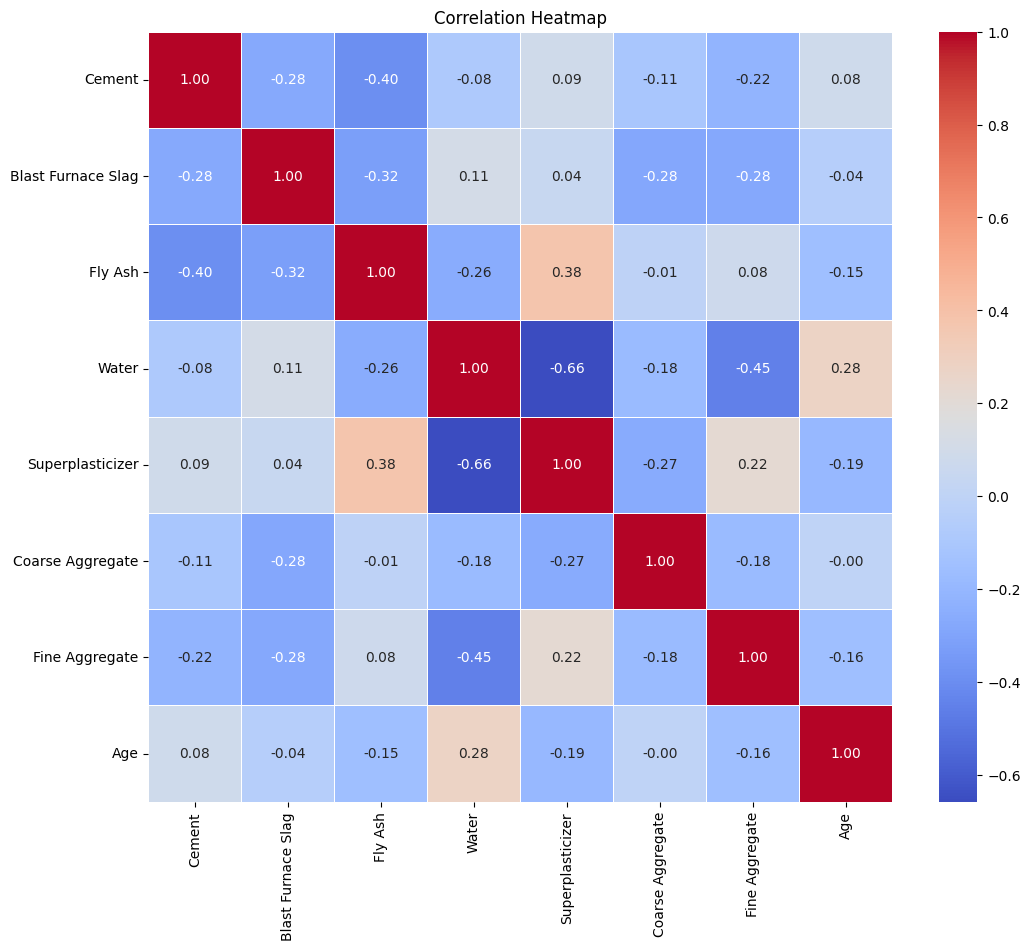

In [25]:
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Remove Highly correlated data

In [26]:
# Remove features with correlation higher than 0.65
high_correlation_features = corr_matrix[abs(corr_matrix) > 0.8]
high_correlation_features = high_correlation_features.stack().reset_index()
high_correlation_features = high_correlation_features[high_correlation_features['level_0'] != high_correlation_features['level_1']]
high_correlation_features

,level_0,level_1,0


### Split data into training and testing sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [28]:
# Define kernel
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

kernel  = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

kernel

1**2 * RBF(length_scale=1)

In [29]:
# np.random.seed(0)
# n=50
 
# kernel_ =[kernels.RBF (),
 
#          kernels.RationalQuadratic(),
 
#          kernels.ExpSineSquared(periodicity=10.0),
 
#          kernels.Matern()
#          ]
# print(kernel_, '\n')

# kernel_

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\gaussian_process\kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Accuracy Score: 0.8932038834951457
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.93       162
           1       0.87      0.59      0.70        44

    accuracy                           0.89       206
   macro avg       0.88      0.78      0.82       206
weighted avg       0.89      0.89      0.89       206



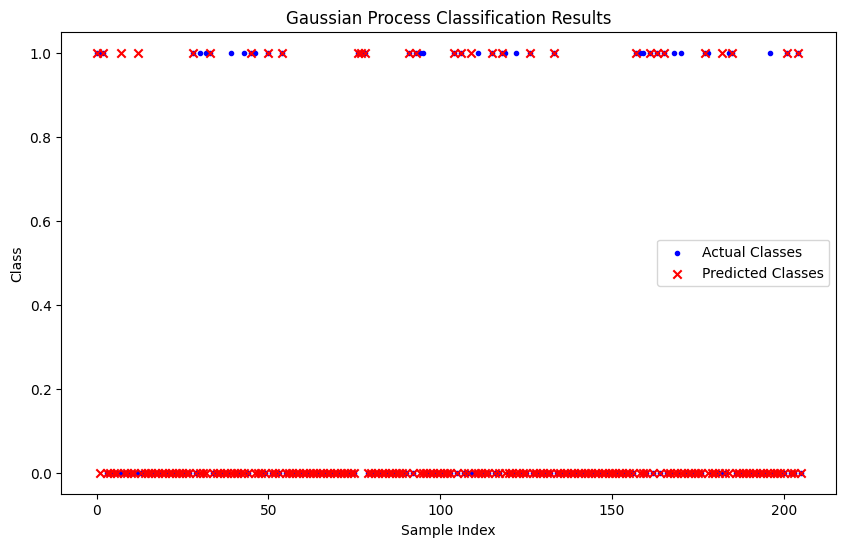

In [30]:
n_restarts_optimizer = 9
# Train Gaussian Process
gpc_model = GaussianProcessClassifier(kernel=kernel, n_restarts_optimizer=10, random_state=42)
gpc_model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = gpc_model.predict(X_test)

# Evaluate the model using accuracy score and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))




# Plot the classification results (if applicable based on the number of classes in y)
# Example plot: scatter plot of predicted vs. actual classes
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, c='blue', label='Actual Classes', marker='.')
plt.scatter(range(len(y_pred)), y_pred, c='red', label='Predicted Classes', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Gaussian Process Classification Results')
plt.legend()
plt.show()


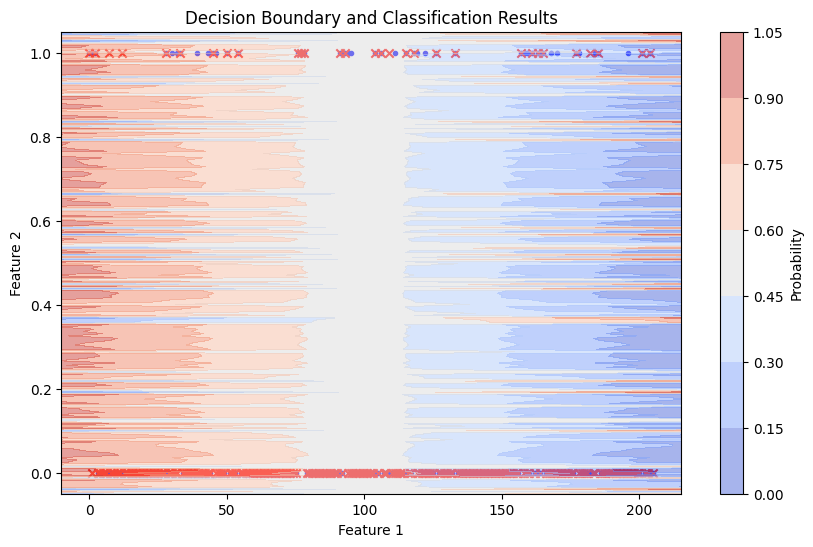

In [31]:

# Selecting two features for decision boundary visualization
feature1_index = 0  # Index of the first feature
feature2_index = 1  # Index of the second feature

# Plot data points
plt.figure(figsize=(10, 6))

plt.scatter(range(len(y_test)), y_test, c='blue', label='Actual Classes', marker='.')
plt.scatter(range(len(y_pred)), y_pred, c='red', label='Predicted Classes', marker='x')

# # Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 2),
                        np.linspace(ylim[0], ylim[1], len(y_test)))

Z = gpc_model.predict_proba(X_test)

plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
plt.colorbar(label='Probability')

plt.xlabel(f'Feature {feature1_index + 1}')
plt.ylabel(f'Feature {feature2_index + 1}')
plt.title('Decision Boundary and Classification Results')
plt.show()

### SGDClassifier by Santhosh Gupta

Accuracy: 0.7912621359223301


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


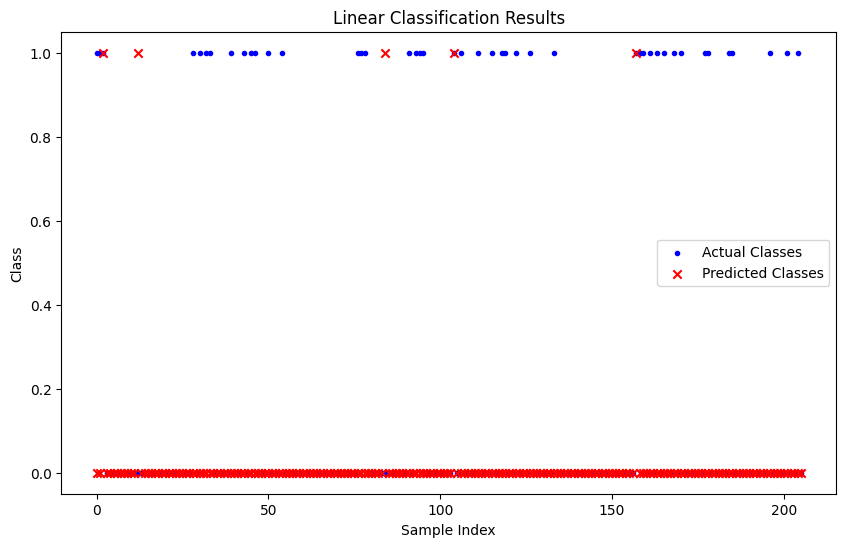

In [32]:
from sklearn.linear_model import SGDClassifier
# Initialize the linear classifier (SGDClassifier)
clf = SGDClassifier(loss='hinge', max_iter=1000, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, c='blue', label='Actual Classes', marker='.')
plt.scatter(range(len(y_pred)), y_pred, c='red', label='Predicted Classes', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Linear Classification Results')
plt.legend()
plt.show()

### GaussianNB Classification by Bipluck Shrestha

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score (Naive Bayes): 0.8058252427184466
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       162
           1       0.56      0.41      0.47        44

    accuracy                           0.81       206
   macro avg       0.71      0.66      0.68       206
weighted avg       0.79      0.81      0.79       206



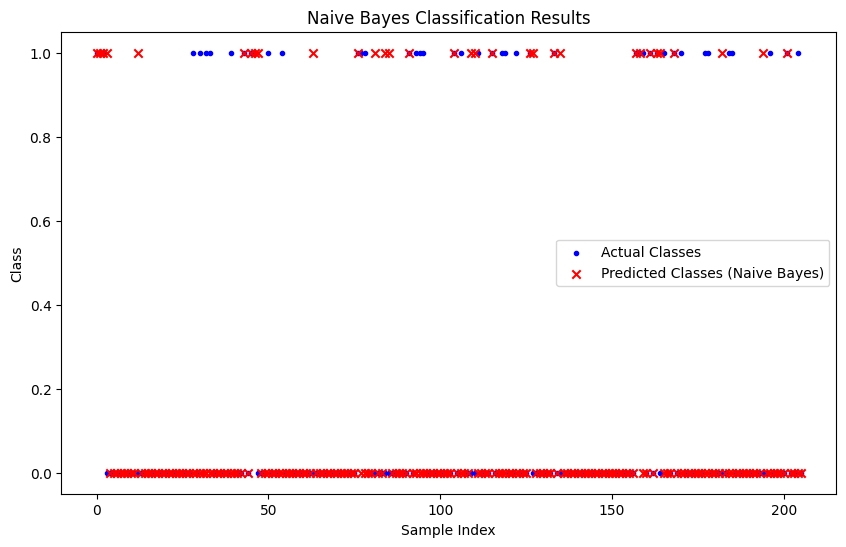

In [33]:
from sklearn.naive_bayes import GaussianNB

# Create and train the Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model using accuracy score and classification report
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy Score (Naive Bayes): {accuracy_nb}")

print("Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))

# Plot the classification results
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, c='blue', label='Actual Classes', marker='.')
plt.scatter(range(len(y_pred_nb)), y_pred_nb, c='red', label='Predicted Classes (Naive Bayes)', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Naive Bayes Classification Results')
plt.legend()
plt.show()
